# Background:
Your friend is a big music buff and at every party starts to play his favorite drinking game „which year was it“. 

The game consists of someone choosing a random song and playing it to the audience. Whomever correctly identifies the year in which the song was released does not have to drink, everyone else has to.

You decide that it is time to turn this around and start developing an algorithm to teach your friend a lesson.



# Task:
Build a model achieving the desired outcome, quantify its performance, describe your approach and recommend a way forward to your management. 

Describe also how you would ensure, together with your Data Engineering colleagues, that the model is deployed, its performance is being monitored and it is being constantly adapted.


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Set Information:


<table border="1" cellpadding="6">
	<tbody><tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">515345</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>

	<tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
		<td><p class="normal">Real</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
		<td><p class="normal">90</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
		<td><p class="normal">2011-02-07</p></td>
	</tr>
	<tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">111649</p></td>
	</tr>
	<!--
	<tr>

		<td bgcolor="#DDEEFF"><p class="normal"><b>Highest Percentage Achieved:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
	-->
</tbody></table>


<center>https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD</center>


You should respect the following train / test split: 
train: first 463,715 examples 
test: last 51,630 examples 
It avoids the 'producer effect' by making sure no song 
from a given artist ends up in both the train and test set.


# Attribute Information:

90 attributes, 12 = timbre average, 78 = timbre covariance 

The first value is the year (target), ranging from 1922 to 2011.

Features extracted from the 'timbre' features from The Echo Nest API. 

We take the average and covariance over all 'segments', each segment 
being described by a 12-dimensional timbre vector.



![img](img/Fig1_paper.PNG)

In [2]:
headers = ['Year']
timbre_avg =  12 
timbre_cov = 78   
timbre_avg_headers =  [('timbre_avg_'+str(x)) for x in range(timbre_avg)]
timbre_cov_headers =  [('timbre_cov_'+str(x)) for x in range(timbre_cov)]

headers = headers + timbre_avg_headers +  timbre_cov_headers

In [3]:
data = pd.read_csv('data/YearPredictionMSD.txt', names=headers)

In [4]:
data.head()

,Year,timbre_avg_0,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,...,timbre_cov_68,timbre_cov_69,timbre_cov_70,timbre_cov_71,timbre_cov_72,timbre_cov_73,timbre_cov_74,timbre_cov_75,timbre_cov_76,timbre_cov_77
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [5]:
data.tail()

,Year,timbre_avg_0,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,...,timbre_cov_68,timbre_cov_69,timbre_cov_70,timbre_cov_71,timbre_cov_72,timbre_cov_73,timbre_cov_74,timbre_cov_75,timbre_cov_76,timbre_cov_77
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909
515344,2005,51.85726,59.11655,26.39436,-5.46030,-20.69012,-19.95528,-6.72771,2.29590,10.31018,...,-11.50511,-69.18291,60.58456,28.64599,-4.39620,-64.56491,-45.61012,-5.51512,32.35602,12.17352


Text(0.5,1,'Distribution of songs by year')

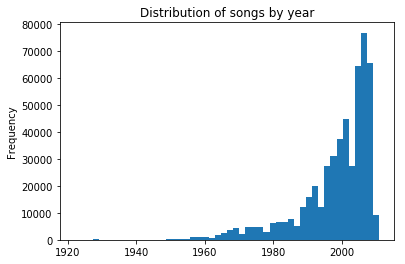

In [6]:
data['Year'].plot.hist(bins=50)
plt.title('Distribution of songs by year')

In [7]:
data['timbre_avg'] = data[timbre_avg_headers].mean(axis=1)
data['timbre_cov_avg'] = data[timbre_cov_headers].mean(axis=1)

data['timbre_max'] = data[timbre_avg_headers].max(axis=1)
data['timbre_cov_max'] = data[timbre_cov_headers].max(axis=1)

data['timbre_min'] = data[timbre_avg_headers].min(axis=1)
data['timbre_cov_min'] = data[timbre_cov_headers].min(axis=1)

data['timbre_std'] = data[timbre_avg_headers].std(axis=1)
data['timbre_cov_std'] = data[timbre_cov_headers].std(axis=1)

data['timbre_median'] = data[timbre_avg_headers].median(axis=1)
data['timbre_cov_median'] = data[timbre_cov_headers].median(axis=1)

In [8]:
data.loc[:,'timbre_avg':'timbre_cov_median'].head(5)

,timbre_avg,timbre_cov_avg,timbre_max,timbre_cov_max,timbre_min,timbre_cov_min,timbre_std,timbre_cov_std,timbre_median,timbre_cov_median
0,7.655009,53.460320,73.07750,951.08960,-25.01202,-317.87038,28.608080,178.362637,0.503075,3.479260
1,12.419617,83.763504,70.32679,2056.93836,-24.83777,-407.64130,25.506573,293.215599,6.679200,17.620260
2,11.860006,48.571940,55.81851,1016.00954,-18.54940,-297.00587,23.142331,195.192180,2.065355,6.099225
3,4.597080,76.461239,48.24750,2174.08189,-26.21683,-181.34947,19.842678,298.262721,1.779730,7.237375
4,10.966413,47.632014,67.09964,894.28471,-16.81409,-295.98542,27.726378,176.476156,1.900730,2.056130


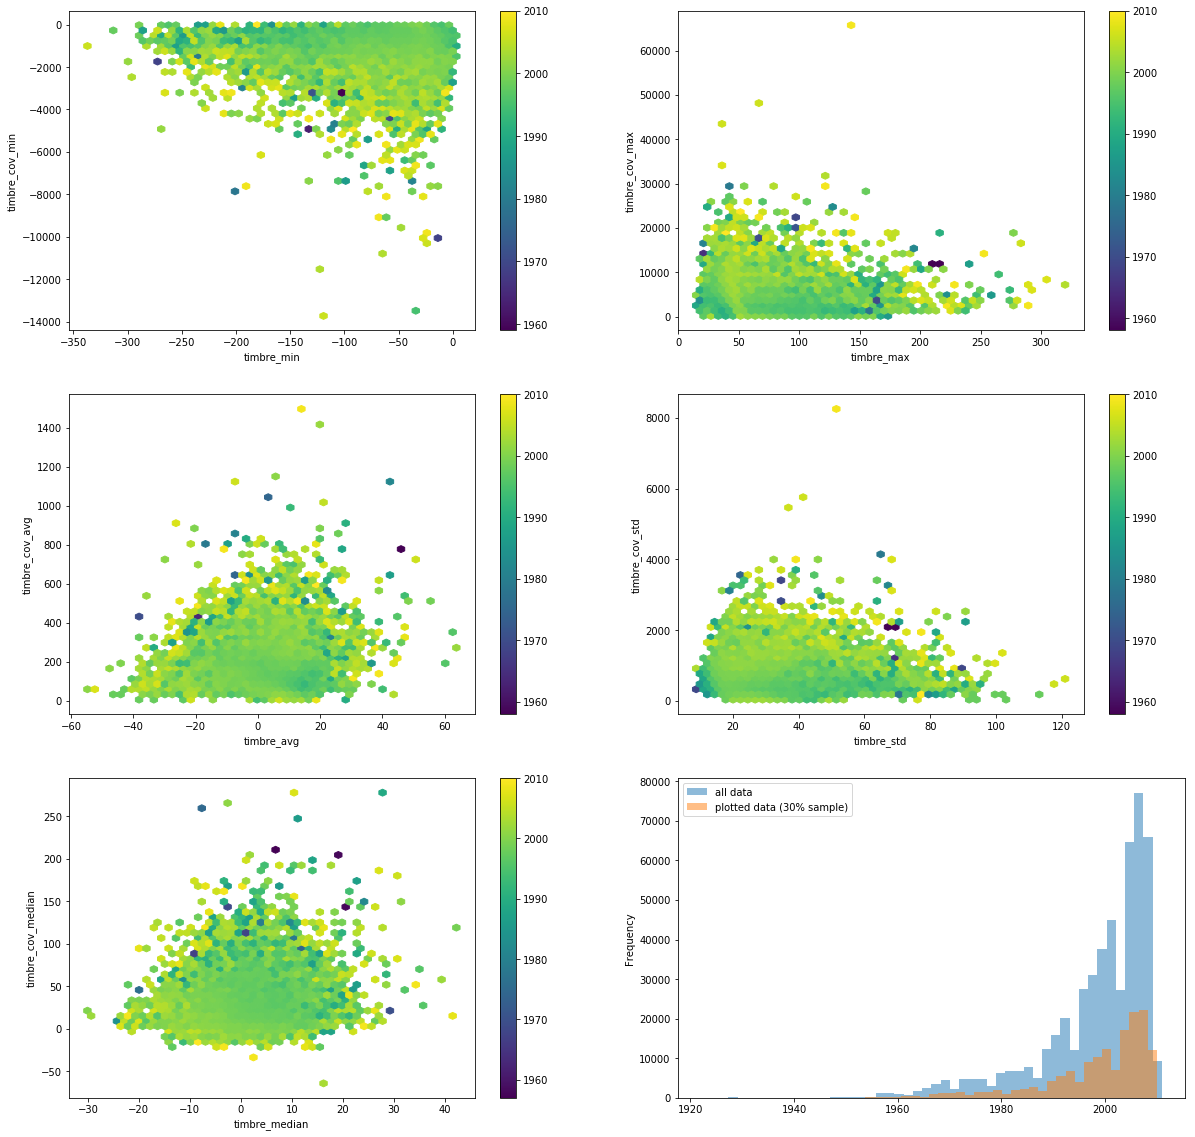

In [9]:
data_sample =  data.sample(frac=0.3)


fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))


data_sample.plot.hexbin(x='timbre_min', y='timbre_cov_min', C='Year',
                        gridsize=50, ax=ax[0,0], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_max', y='timbre_cov_max', C='Year',
                        gridsize=50, ax=ax[0,1], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_avg', y='timbre_cov_avg', C='Year',
                        gridsize=50, ax=ax[1,0], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_std', y='timbre_cov_std', C='Year',
                        gridsize=50, ax=ax[1,1], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_median', y='timbre_cov_median', C='Year',
                        gridsize=50, ax=ax[2,0], cmap=plt.cm.viridis)

data['Year'].plot.hist(bins=50, ax=ax[2,1],
                       label='all data', alpha=0.5)
data_sample['Year'].plot.hist(bins=50, ax=ax[2,1],
                              label='plotted data (30% sample)', alpha=0.5)

plt.legend();

plt.show()

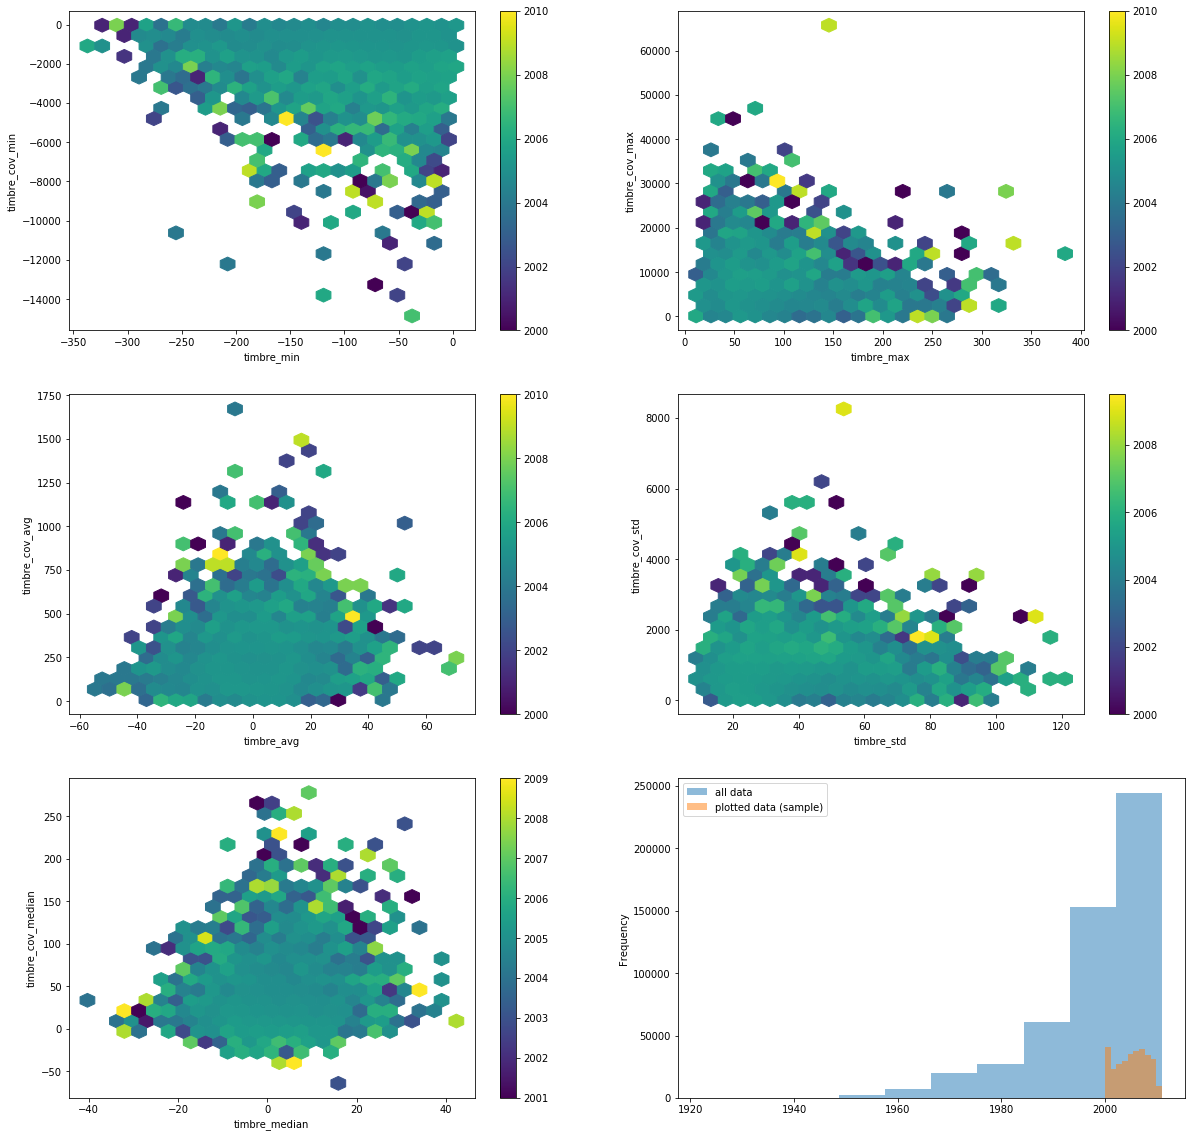

In [10]:
data_sample =  data.query('Year>=2000')#.sample(frac=0.5)


fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))


data_sample.plot.hexbin(x='timbre_min', y='timbre_cov_min', C='Year',
                        gridsize=25, ax=ax[0,0], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_max', y='timbre_cov_max', C='Year',
                        gridsize=25, ax=ax[0,1], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_avg', y='timbre_cov_avg', C='Year',
                        gridsize=25, ax=ax[1,0], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_std', y='timbre_cov_std', C='Year',
                        gridsize=25, ax=ax[1,1], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_median', y='timbre_cov_median', C='Year',
                        gridsize=25, ax=ax[2,0], cmap=plt.cm.viridis)

data['Year'].plot.hist(ax=ax[2,1],
                       label='all data', alpha=0.5)
data_sample['Year'].plot.hist(ax=ax[2,1],
                              label='plotted data (sample)', alpha=0.5)

plt.legend();

plt.show()

# Building a model

First, we need to split the data between the training and testing subsets:

In [11]:
X_train = data.values[:463715,1:]
y_train = data.values[:463715,0]

In [12]:
X_train.shape

(463715, 100)

In [13]:
X_test = data.values[463715:,1:]
y_test = data.values[463715:,0]

In [14]:
y_test.shape

(51630,)

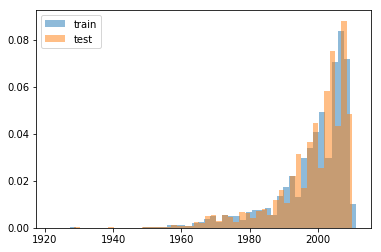

In [15]:
plt.hist(y_train, label='train', bins=50, alpha=0.5, density=True)
plt.hist(y_test, label='test',  bins=50, alpha=0.5, density=True)
plt.legend();

It look's like the suggested split training/test was done fairly well.

The high dimensionality and number of entries (rows) will be a problem against performance.

# Stochastic Gradient Descent

As a first attempt, we will be using Stochastic Gradient Descent:
http://scikit-learn.org/stable/modules/sgd.html#classification

Advantages:

- Efficiency.
- Ease of implementation (lots of opportunities for code tuning).

Disadvantages:

- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
- SGD is sensitive to feature scaling.

We need to scale the variables first:

In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # apply same transformation to test data

In [17]:
X =  X_train_scaled #[:10000,:]
y = y_train#[:10000]

We are ready:

In [18]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, tol=1e-3, n_jobs=4)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=4, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [19]:
y_pred = clf.predict(X_test_scaled)

In [20]:
y_test[:10]

array([2007., 2003., 2005., 2003., 2005., 2007., 2003., 2003., 2003.,
       2005.])

In [21]:
y_pred[:10]

array([1994., 2009., 2008., 2008., 2005., 1989., 2006., 1980., 2006.,
       2009.])

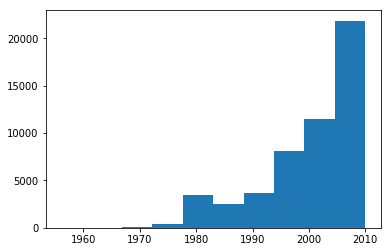

In [22]:
plt.hist(y_pred);

In [23]:
def myscore(pred, truth):
    score = np.sum(pred==truth)/ len(truth)
    avg_error = np.sum(np.abs(pred-truth))/len(pred)
    print('accuracy (%):', round(100*score,2))
    print('avg_error:', round(avg_error,1))
    return score

In [24]:
_ = myscore(y_pred, y_test)

accuracy (%): 5.65
avg_error: 8.4


<div class="alert alert-success">
5.8% of accuracy! It seems very low but according to the original source:
<div>

![img](img/training_paper.png)

We should be suspicius baout this low numbers. For example, given the skewed distribution of the data towards the 2000's, a random guess will be also worth to try it as a model.

In [25]:
y_random = np.random.choice(range(2005,2009), size=len(y_test))

In [26]:
_ = myscore(y_random, y_test)

accuracy (%): 7.18
avg_error: 8.8


<div class="alert alert-warning">
A random guess between 2005 and 2008 gives as a better probability of winning the game (~7%) than our sophisticated model.
<div>

If we fit the actual distribution the model and use it for the random guesses

In [27]:
from scipy import stats

In [28]:
data_sample =  data.sample(frac=0.3)

year_data = data_sample['Year'].values # reversed

In [ ]:
a1, b1, loc1, scale1 = stats.beta.fit(year_data)

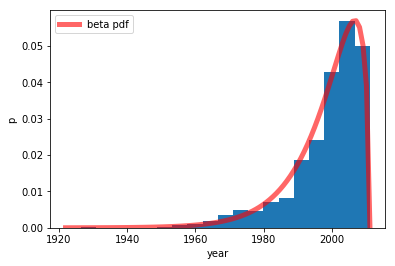

In [30]:
x_prob = np.linspace(year_data.min(), year_data.max(),
                      (year_data.max()-year_data.min()),
                     endpoint=True)

plt.hist(year_data, bins=20, density=True)
plt.xlabel('year')
plt.ylabel('p')

p_prob = stats.beta.pdf(x_prob, a1, b1, loc1, scale1)
plt.plot(x_prob, p_prob,
       'r-', lw=5, alpha=0.6, label='beta pdf')

plt.legend()

In [31]:
y_random = np.random.choice(np.ceil(x_prob), size=len(y_test), p=p_prob/p_prob.sum())

In [32]:
y_random

array([1978., 1992., 2006., ..., 2001., 2006., 1989.])

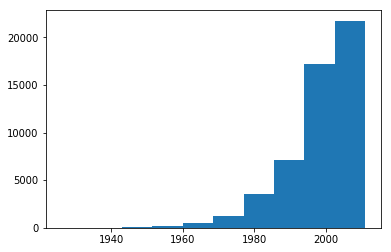

In [33]:
plt.hist(y_random);

In [34]:
_ = myscore(y_random, np.random.permutation(y_test))

accuracy (%): 3.93
avg_error: 10.8



<div class="alert alert-warning">
Basically, it looks like we are caputuring the distribution of the data rather than the features of the songs.
</div>

# High dimensional plots

Instead of representing simple statistics of the data, we can try to visualize all the timbres and covariences for each segment.

In [35]:
data_sample =  data.sample(frac=0.0001)

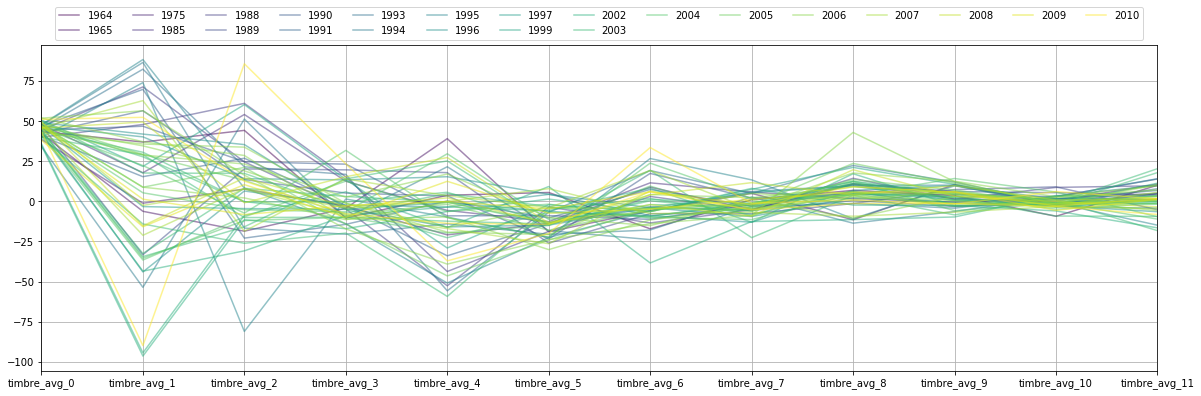

In [36]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(20,6))

parallel_coordinates(data_sample.sort_values('Year'), class_column='Year',                     
                     cols=timbre_avg_headers, colormap='viridis',
                     axvlines=False, alpha=0.5)


plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, 1.), ncol=15);

Let's group the data by year and take the average of the features.

In [37]:
data_sample =  data.sample(frac=0.3)

data_sample_by_year = data_sample.groupby(by='Year', as_index=False).mean()
data_sample_by_year.head()

,Year,timbre_avg_0,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,...,timbre_avg,timbre_cov_avg,timbre_max,timbre_cov_max,timbre_min,timbre_cov_min,timbre_std,timbre_cov_std,timbre_median,timbre_cov_median
0,1922,37.586330,-159.682170,160.661210,35.992860,13.201560,9.031910,-24.802410,6.717460,-6.860470,...,4.819478,95.356990,160.661210,1125.625620,-159.682170,-276.679950,70.622808,255.066579,3.445545,17.174300
1,1924,36.633488,-134.545453,116.694425,13.251885,0.363035,1.812105,-42.063085,2.165615,11.541197,...,1.749107,111.718479,116.694425,1577.374682,-134.545453,-769.646325,58.720344,392.118355,7.552115,21.193055
2,1925,34.813380,-175.121515,100.818260,9.765695,41.191140,23.365385,-60.044715,7.378555,12.231715,...,1.716802,216.763946,106.099755,4141.647345,-175.121515,-1645.383335,68.422162,845.372347,11.165455,55.562195
3,1926,31.813702,-140.894352,80.303247,21.526587,-31.625858,9.536550,-0.309682,21.724400,-36.550110,...,-4.193271,91.988478,80.303247,1343.192880,-140.894352,-323.410548,54.717513,282.371223,5.001773,16.011339
4,1927,31.456126,-113.488306,46.525374,3.209865,-12.864735,13.544936,-22.373828,13.534945,-24.361608,...,-4.982847,148.823125,53.910069,2475.804287,-115.394848,-671.644492,44.072442,515.762671,2.967557,26.412502


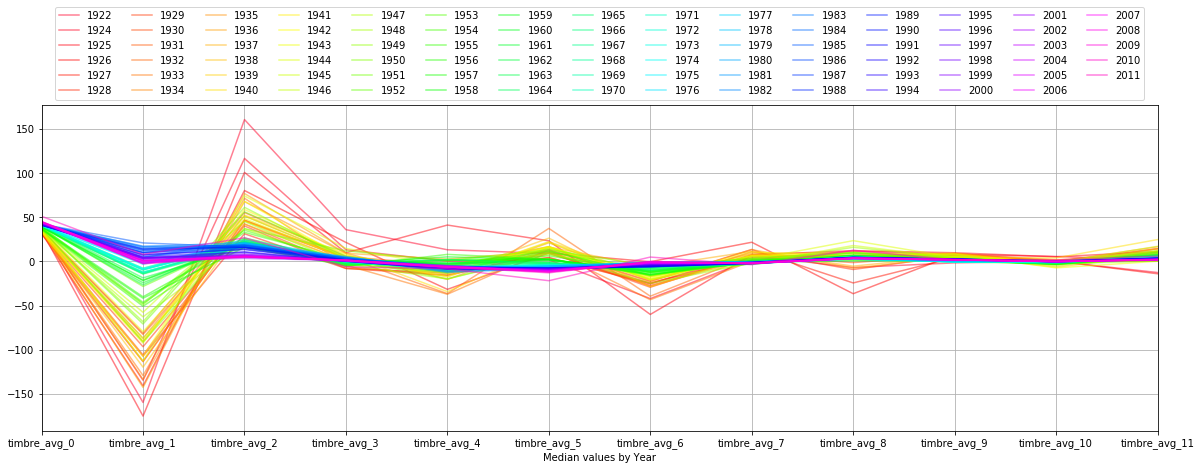

In [38]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(20,6))

parallel_coordinates(data_sample_by_year, class_column='Year',
                     cols=timbre_avg_headers, colormap='gist_rainbow',
                     axvlines=False, alpha=0.5)


plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, 1.), ncol=15);
plt.xlabel('Median values by Year');

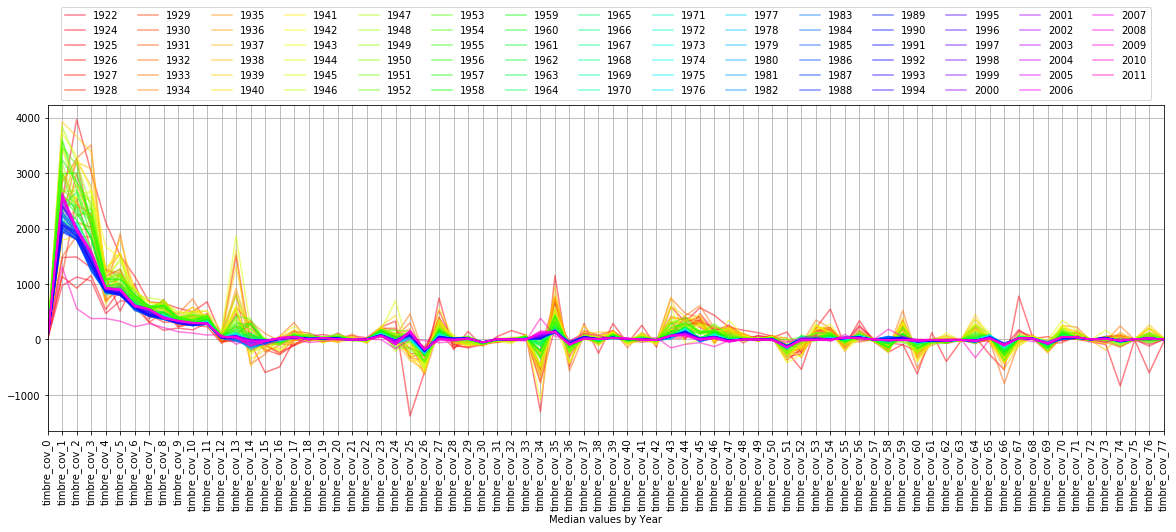

In [39]:
plt.figure(figsize=(20,6))

parallel_coordinates(data_sample_by_year, class_column='Year',
                     cols=timbre_cov_headers, colormap='gist_rainbow',
                     axvlines=False, alpha=0.5)

plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, 1.), ncol=15)
plt.xticks(rotation='vertical');
plt.xlabel('Median values by Year');

It looks like there is some pattern we could explore. Another way of representing high-dimensional data is using Adnrews curves.

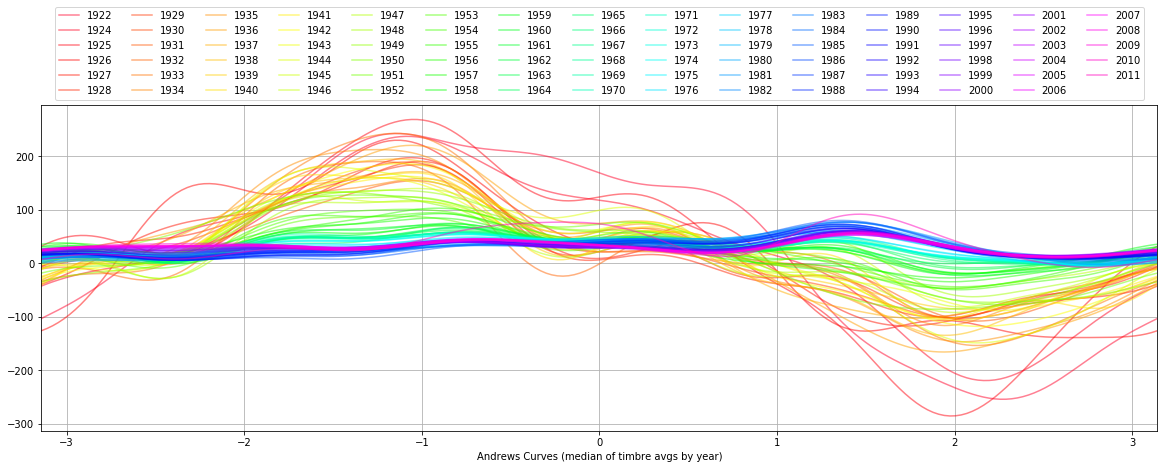

In [40]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(20,6))

andrews_curves(data_sample_by_year.loc[:, 'Year':'timbre_avg_11'], 'Year',
               alpha=0.5, colormap='gist_rainbow')

plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, 1.), ncol=15)
plt.xlabel('Andrews Curves (median of timbre avgs by year)');

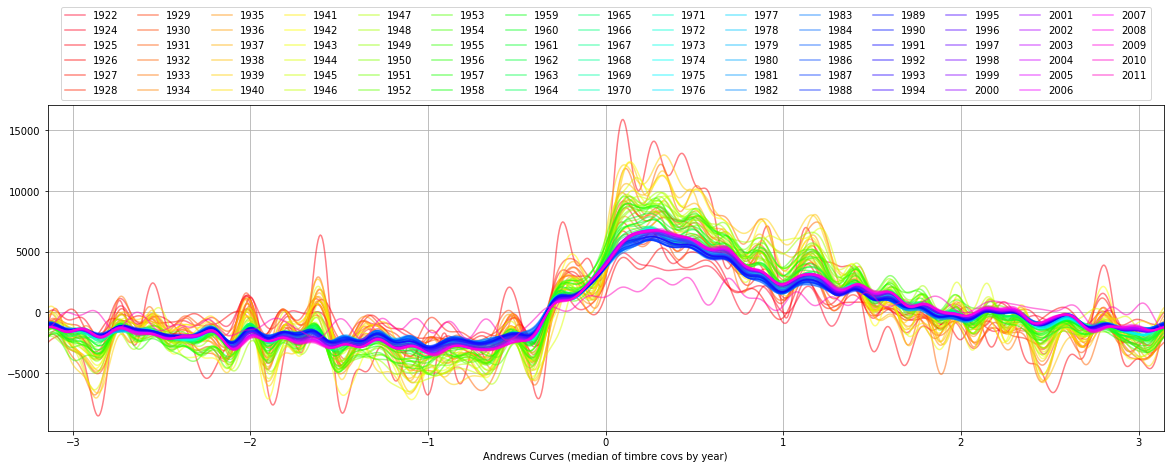

In [41]:
plt.figure(figsize=(20,6))

year_and_timbre_cov_indexes = ['Year']+timbre_cov_headers
andrews_curves(data_sample_by_year[year_and_timbre_cov_indexes], 'Year',
               alpha=0.5, colormap='gist_rainbow', samples=1000)

plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, 1.), ncol=15)
plt.xlabel('Andrews Curves (median of timbre covs by year)');

<div class="alert alert-success"> Features flatten as the year of the song increases. This could be again a result of the skeweed data set or something worth to be explored
<div>

**This is not a trivial task, recognizing exact year of songs is certainly a challenge. If we want to teach a lesson we can talk about this quick study and how does Google recognize speech or songs.**

_other unsuccesful attempts_

# Stochastic Gradient Descent + Kernel approximation

In [42]:
X_train = data.values[:463715,1:]
y_train = data.values[:463715,0]

In [43]:
X_test = data.values[463715:,1:]
y_test = data.values[463715:,0]

In [44]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # apply same transformation to test data

In [45]:
X =  X_train_scaled #[:10000,:]
y = y_train#[:10000]

http://scikit-learn.org/stable/modules/kernel_approximation.html

In [46]:
data_grouped = data.iloc[:463715,:].groupby(by='Year', as_index=False).mean() # Only grouping the training data

In [47]:
from sklearn.kernel_approximation import RBFSampler, SkewedChi2Sampler, AdditiveChi2Sampler
from sklearn.linear_model import SGDClassifier

n_years = data_grouped['Year'].max()-data_grouped['Year'].min()

rbf_feature = RBFSampler(gamma=1, n_components=n_years, random_state=1)
#rbf_feature = SkewedChi2Sampler(n_components=n_years, random_state=1)
# rbf_feature = AdditiveChi2Sampler()

X_features = rbf_feature.fit_transform(X)

clf = SGDClassifier(max_iter=1000, tol=1e-3, n_jobs=4)   
clf.fit(X_features, y)


clf.score(X_features, y)


0.05034126564808126

In [48]:
y_pred = clf.predict(rbf_feature.fit_transform(X_test_scaled))

In [49]:
y_test[:10]

array([2007., 2003., 2005., 2003., 2005., 2007., 2003., 2003., 2003.,
       2005.])

In [50]:
y_pred[:10]

array([2007., 2007., 2007., 2007., 2000., 2007., 2003., 2006., 2007.,
       2002.])

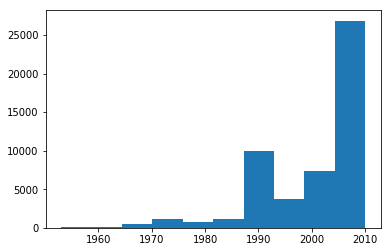

In [51]:
plt.hist(y_pred);

In [52]:
myscore(y_pred,y_test)

accuracy (%): 5.06
avg_error: 10.4


0.05059074181677319

# Simplified model

In [53]:
data = pd.read_csv('data/YearPredictionMSD.txt', names=headers)

In [54]:
data_grouped = data.iloc[:463715,:].groupby(by='Year', as_index=False).mean() # Only grouping the training data

In [55]:
data_grouped.head()

,Year,timbre_avg_0,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,...,timbre_cov_68,timbre_cov_69,timbre_cov_70,timbre_cov_71,timbre_cov_72,timbre_cov_73,timbre_cov_74,timbre_cov_75,timbre_cov_76,timbre_cov_77
0,1922,41.563847,13.908623,14.684642,24.427253,18.752738,11.173280,-5.309713,0.136818,-2.164830,...,0.852160,-117.726955,7.403702,133.977620,7.201512,86.955653,-161.417080,14.144575,29.105555,-13.993552
1,1924,36.945466,-136.050156,108.086914,12.351610,-7.730282,1.872898,-32.485724,3.362986,14.375366,...,26.805278,-103.342922,5.517028,57.540930,-3.644502,-2.221816,-117.479828,-6.521120,17.303896,-2.421044
2,1925,34.359443,-128.216647,120.177701,19.374040,18.185651,17.011220,-56.728221,7.616783,3.783979,...,13.667651,-111.001374,44.301009,13.220950,-24.297050,-45.207436,-345.611747,-0.836293,-268.567001,-13.933473
3,1926,32.572120,-126.464657,88.917274,7.843321,-5.841375,13.394603,-31.141998,9.859703,-17.412415,...,30.622798,-84.588056,66.738752,80.698264,-10.574744,2.554846,7.627443,-5.259586,70.703803,11.884001
4,1927,30.983776,-108.975771,56.376868,3.542811,-7.610167,9.104995,-20.728775,13.850153,-25.782057,...,25.060019,-116.831664,-11.717547,28.545696,-8.491488,43.285482,-61.601107,-8.333918,29.285672,0.710797


In [56]:
data_grouped.tail()

,Year,timbre_avg_0,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,...,timbre_cov_68,timbre_cov_69,timbre_cov_70,timbre_cov_71,timbre_cov_72,timbre_cov_73,timbre_cov_74,timbre_cov_75,timbre_cov_76,timbre_cov_77
84,2007,44.886843,-0.114246,5.908696,1.049448,-5.905374,-11.568121,-0.624745,-2.027971,3.409791,...,14.596100,-74.343671,47.112424,40.720894,1.224263,10.205680,-19.997599,3.445839,19.125562,0.531186
85,2008,44.970053,0.428995,5.136278,1.200317,-5.097333,-12.087106,-0.544979,-1.964768,3.479645,...,13.857855,-79.534805,45.580558,41.455116,1.521595,7.932504,-20.154507,3.027505,20.026123,0.001124
86,2009,45.124814,0.605233,5.567852,1.656720,-6.333922,-12.063430,-0.210244,-2.058480,3.606555,...,14.296358,-80.978387,47.326523,41.230641,1.203679,9.160702,-16.598881,2.859775,21.429545,0.284731
87,2010,45.109055,-2.175159,5.692600,1.280848,-6.696128,-12.820146,-0.050404,-2.429472,3.832905,...,13.535516,-79.986297,43.027888,38.750877,0.475301,4.967690,-17.009713,2.646176,22.282304,0.170669
88,2011,51.076400,8.056110,26.785990,-6.017960,-8.340820,-21.832060,4.943210,-3.647010,12.605120,...,-38.100350,-29.982930,53.270480,30.049340,-0.175670,-49.744640,26.766680,-4.197000,-3.009790,2.284110


First, we need to split the data between the training and testing subsets:

In [57]:
# X_train = data.iloc[:463715,1:]
# y_train = data.iloc[:463715,0]

X_train = data_grouped.iloc[:,1:]
y_train = data_grouped.iloc[:,0]

In [58]:
X_test = data.values[463715:,1:]
y_test = data.values[463715:,0]

In [59]:
X_train.tail()

,timbre_avg_0,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,timbre_avg_9,...,timbre_cov_68,timbre_cov_69,timbre_cov_70,timbre_cov_71,timbre_cov_72,timbre_cov_73,timbre_cov_74,timbre_cov_75,timbre_cov_76,timbre_cov_77
84,44.886843,-0.114246,5.908696,1.049448,-5.905374,-11.568121,-0.624745,-2.027971,3.409791,1.871742,...,14.596100,-74.343671,47.112424,40.720894,1.224263,10.205680,-19.997599,3.445839,19.125562,0.531186
85,44.970053,0.428995,5.136278,1.200317,-5.097333,-12.087106,-0.544979,-1.964768,3.479645,1.968187,...,13.857855,-79.534805,45.580558,41.455116,1.521595,7.932504,-20.154507,3.027505,20.026123,0.001124
86,45.124814,0.605233,5.567852,1.656720,-6.333922,-12.063430,-0.210244,-2.058480,3.606555,1.956787,...,14.296358,-80.978387,47.326523,41.230641,1.203679,9.160702,-16.598881,2.859775,21.429545,0.284731
87,45.109055,-2.175159,5.692600,1.280848,-6.696128,-12.820146,-0.050404,-2.429472,3.832905,1.762547,...,13.535516,-79.986297,43.027888,38.750877,0.475301,4.967690,-17.009713,2.646176,22.282304,0.170669
88,51.076400,8.056110,26.785990,-6.017960,-8.340820,-21.832060,4.943210,-3.647010,12.605120,1.740840,...,-38.100350,-29.982930,53.270480,30.049340,-0.175670,-49.744640,26.766680,-4.197000,-3.009790,2.284110


In [60]:
y_train.tail()

84    2007
85    2008
86    2009
87    2010
88    2011
Name: Year, dtype: int64

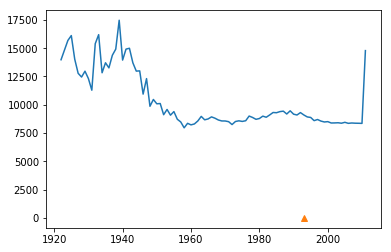

In [61]:
i=100

difference = np.abs(X_train-X_test[i,:])
plt.plot(y_train, difference.sum(axis=1))
plt.plot(y_test[i], 0, '^')